In [14]:
# Importing Necessary Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Size of plot width=20, height=10
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#for 3d plot
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Reading Data
data = pd.read_csv('student.csv')

print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [16]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values
m = len(math)
x0 = np.ones(m)
x = np.array([x0, math, read])
# Initial Coefficients
B = np.array([0, 0, 0])
y = np.array(write)
alpha = 0.0001


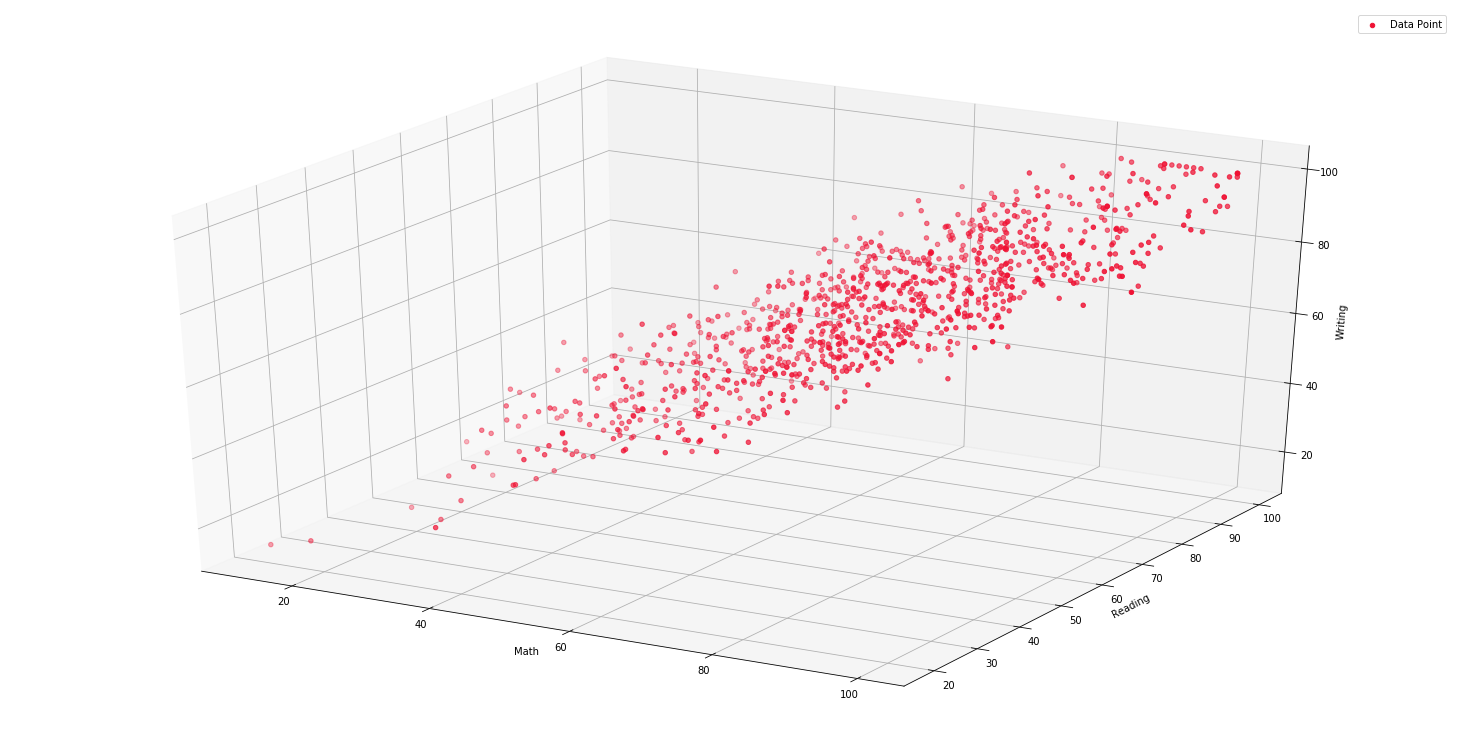

In [17]:
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234',label='Data Point')
ax.set_xlabel('Math')
ax.set_ylabel('Reading')
ax.set_zlabel("Writing")
plt.legend()
plt.show()


In [4]:
for epoch in range(100000):
    # Compute Hypothesis
    h = x.T.dot(B)
    # Compute Loss
    loss = h-y
    gradient = x.dot(loss) / m
    B = B - alpha * gradient
    if epoch%1000 == 0:
        print(epoch,B)

0 [0.0068616 0.4801185 0.5006844]
1000 [0.00273468 0.09438767 0.89191601]
2000 [-0.00313068  0.08920273  0.89700337]
3000 [-0.00899389  0.08916156  0.89712373]
4000 [-0.01483382  0.08918814  0.89717835]
5000 [-0.02065028  0.08921551  0.89723188]
6000 [-0.02644338  0.08924278  0.89728519]
7000 [-0.0322132   0.08926994  0.89733829]
8000 [-0.03795983  0.08929699  0.89739117]
9000 [-0.04368338  0.08932393  0.89744384]
10000 [-0.04938393  0.08935076  0.8974963 ]
11000 [-0.05506157  0.08937749  0.89754855]
12000 [-0.06071641  0.08940411  0.89760059]
13000 [-0.06634852  0.08943062  0.89765242]
14000 [-0.071958    0.08945702  0.89770404]
15000 [-0.07754494  0.08948332  0.89775545]
16000 [-0.08310943  0.08950951  0.89780666]
17000 [-0.08865157  0.0895356   0.89785766]
18000 [-0.09417144  0.08956158  0.89790846]
19000 [-0.09966912  0.08958746  0.89795905]
20000 [-0.10514472  0.08961324  0.89800944]
21000 [-0.11059832  0.08963891  0.89805963]
22000 [-0.11603001  0.08966448  0.89810961]
23000 [-0.

In [28]:
B = [-0.47492787, 0.09135386 , 0.90141236] #last epoch b

In [26]:
# Model Evaluation - RMSE
def rmse(y, y_pred):
    rmse = np.sqrt(sum((y - y_pred) ** 2) / len(y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(y, y_pred):
    mean_y = np.mean(y)
    ss_tot = sum((y - mean_y) ** 2)
    ss_res = sum((y - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

y_pred = x.T.dot(B)

print("Mean Square Error : ",rmse(y, y_pred))
print("Accuracy : ",r2_score(y, y_pred))

Mean Square Error :  4.577178337938488
Accuracy :  0.9097209716909908


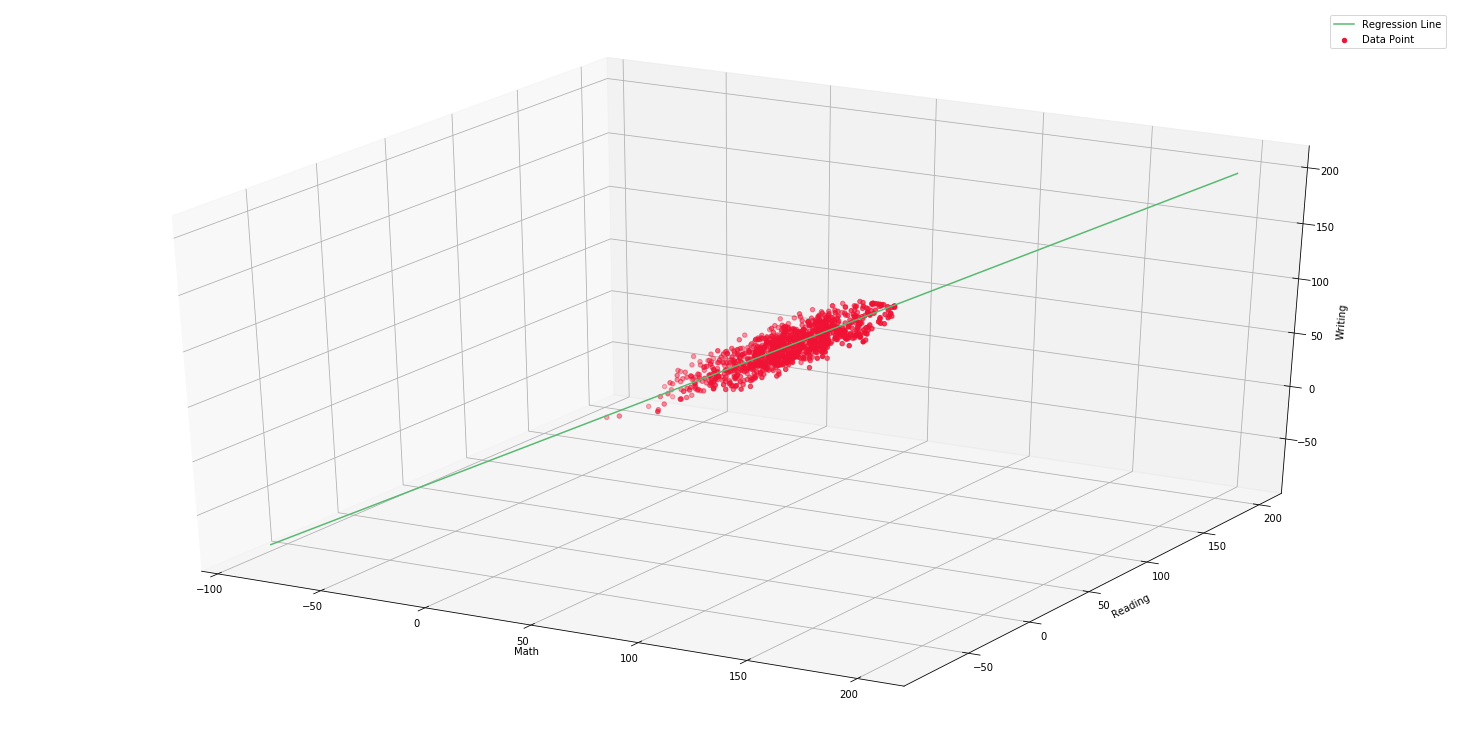

In [27]:
max_x = np.max(math) + 100
min_x = np.min(math) - 100

max_y = np.max(read) + 100
min_y = np.min(read) - 100

max_yp = np.max(y_pred) + 100
min_yp = np.min(y_pred) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = np.linspace(min_y, max_y, 1000)
yp = np.linspace(min_yp, max_yp, 1000)

# Ploting the scores as scatter plot

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, yp, color='#58b970', label='Regression Line')
ax.scatter(math, read, write, color='#ef1234',label='Data Point')
ax.set_xlabel('Math')
ax.set_ylabel('Reading')
ax.set_zlabel("Writing")
plt.legend()
plt.show()
